# Baseball Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import power_transform

In [2]:
baseball_ds = pd.read_csv("Baseball.csv")
baseball_ds1 = baseball_ds.copy()
baseball_ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
baseball_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
# let explore the statistic

baseball_ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


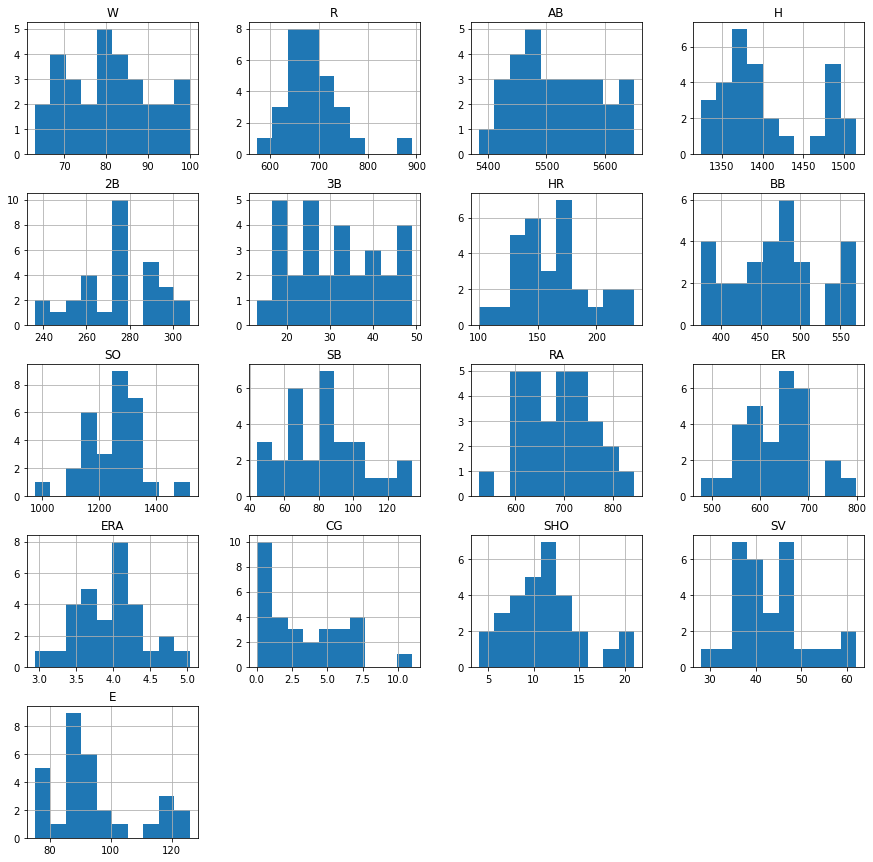

In [5]:
#Univariate Analysis
baseball_ds.hist(figsize=(15,15));

In [6]:
baseball_ds.skew()*100

W        4.708869
R      120.078636
AB      18.343656
H       67.025372
2B     -23.064992
3B      12.950245
HR      51.644074
BB      15.849848
SO     -15.606548
SB      47.989287
RA       4.573398
ER       5.870980
ERA      5.333134
CG      73.684527
SHO     56.579043
SV      65.752355
E       89.013183
dtype: float64

<AxesSubplot:>

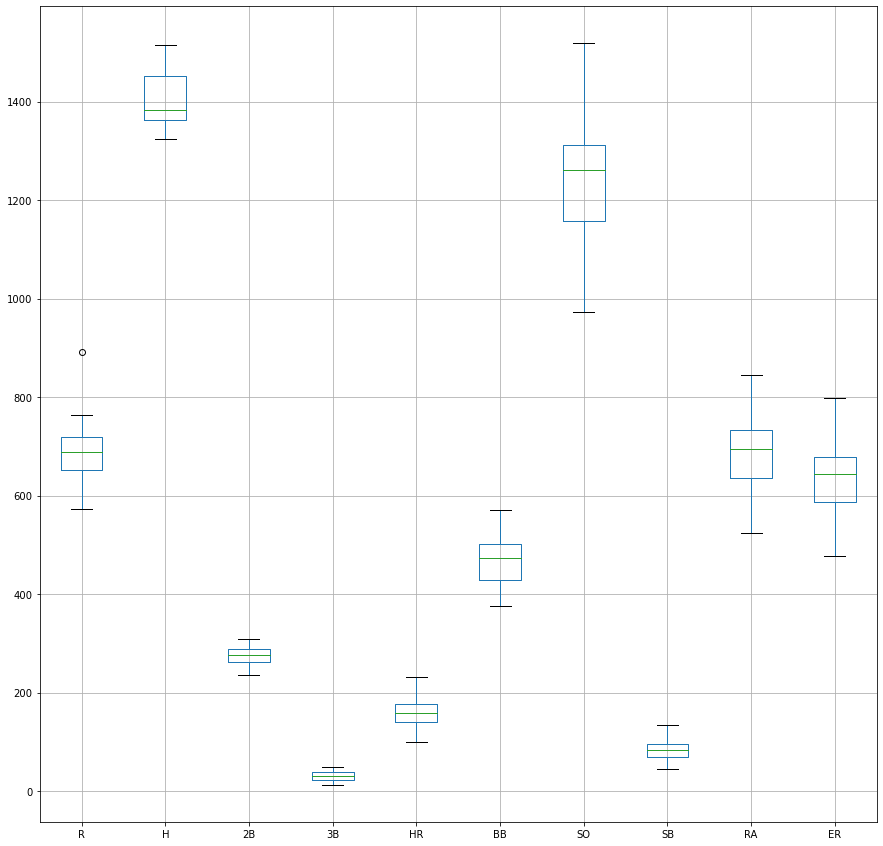

In [7]:
# let check the outlier as well in the dataset 
baseball_ds.drop(columns =["AB","W","ERA","CG","SHO","SV","E"]).boxplot(figsize=(15,15))

<AxesSubplot:>

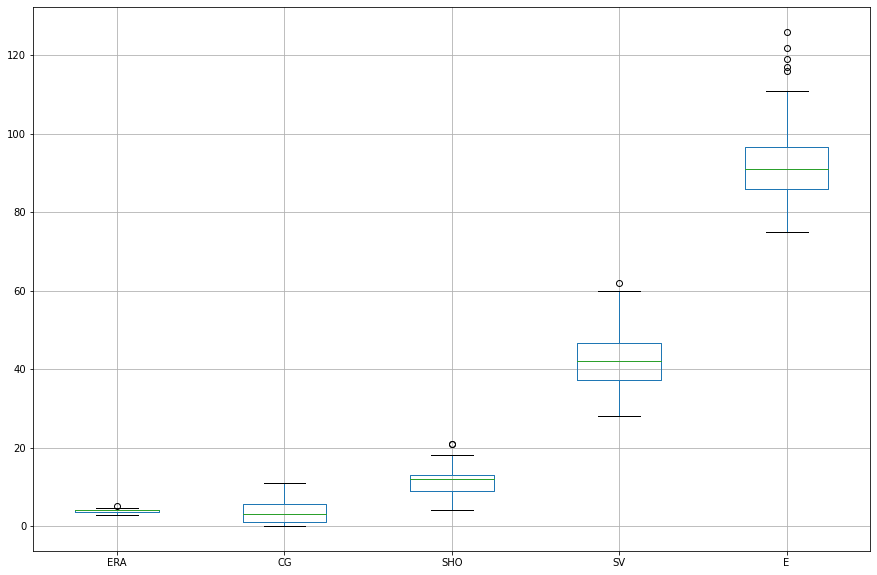

In [8]:
baseball_ds[["ERA","CG","SHO","SV","E"]].boxplot(figsize=(15,10))

<AxesSubplot:>

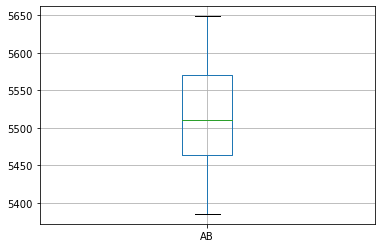

In [9]:
baseball_ds[["AB"]].boxplot()

In [10]:
# checking zscore of a few of the columns
z_score = np.abs(zscore(baseball_ds1["E"]))

In [11]:
z_score

0     0.461470
1     0.607197
2     1.117242
3     0.485758
4     0.607197
5     0.461470
6     0.097152
7     1.262970
8     0.048576
9     0.194303
10    1.797303
11    0.680061
12    0.097152
13    0.024288
14    2.307348
15    0.121439
16    2.015894
17    1.214394
18    1.578712
19    0.315742
20    0.461470
21    0.315742
22    1.262970
23    0.315742
24    1.651576
25    1.408697
26    1.190106
27    0.607197
28    0.170015
29    0.048576
Name: E, dtype: float64

In [12]:
z_score1 = np.abs(zscore(baseball_ds1["R"]))
z_score1

0     0.619078
1     0.134432
2     0.332906
3     1.146419
4     0.013270
5     3.509647
6     1.311430
7     0.428681
8     0.765626
9     1.034489
10    1.086415
11    0.705622
12    0.471376
13    0.557920
14    0.099814
15    0.713699
16    0.151740
17    0.013270
18    0.575229
19    0.834861
20    0.090583
21    0.255593
22    1.302198
23    1.994550
24    1.077184
25    0.367523
26    0.134432
27    0.549843
28    0.661773
29    0.844092
Name: R, dtype: float64

In [13]:
z_score2 = np.abs(zscore(baseball_ds1["ERA"]))
z_score2

0     0.506955
1     0.254598
2     0.641347
3     0.053010
4     1.531318
5     0.350165
6     0.165003
7     0.209800
8     0.484557
9     0.792164
10    0.635374
11    0.865333
12    0.036584
13    0.456185
14    0.411388
15    2.276445
16    1.671683
17    1.335704
18    0.724968
19    0.836961
20    1.178913
21    0.753340
22    0.142604
23    1.016150
24    1.643311
25    1.156515
26    0.529354
27    0.187402
28    0.299395
29    2.427263
Name: ERA, dtype: float64

In [14]:
 # applying sqrt transformation becase it has value 0 and cant applying log on it.
baseball_ds["CG"] = np.sqrt(baseball_ds["CG"])
baseball_ds["ER"] = np.sqrt(baseball_ds["ER"])
baseball_ds["SV"] = np.sqrt(baseball_ds["SV"])
baseball_ds["SHO"] = np.sqrt(baseball_ds["SHO"])

In [15]:
baseball_ds.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER    -0.109548
ERA    0.053331
CG    -0.311476
SHO   -0.061761
SV     0.410288
E      0.890132
dtype: float64

In [16]:
new_data = baseball_ds[["R","H","E"]]
new_data = new_data.astype("float32") #change the data type of the variabel to float

In [17]:
df = power_transform(new_data) # applied power_transform
df = pd.DataFrame(df) # saving into a dataframe becuase it returns numpy array
df.skew()

0    0.121253
1    0.570348
2    0.068565
dtype: float32

In [18]:
new_baseball_ds =  pd.concat([baseball_ds,df],axis =1,join ="inner") # joining both the data points

In [19]:
new_baseball_ds.drop(columns = ["R","H","E"],axis =1, inplace= True) # dropping duplicate columns and keeping transformed columns
new_baseball_ds.rename(columns ={0:"R",1:"H",2:"E"},inplace= True) # while it has converted by power transform their name has been changed to their index to changing columns name to it name


# saving all changes into original variable

baseball_ds = new_baseball_ds.copy()

In [20]:
baseball_ds

,W,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,R,H,E
0,95,5575,300,42,139,383,973,104,641,24.515301,3.73,1.414214,2.828427,7.483315,0.722290,1.632309,-0.336642
1,83,5467,277,44,156,439,1264,70,700,25.553865,4.07,1.414214,3.464102,6.708204,0.243600,-1.019873,-0.530925
2,81,5439,303,29,141,533,1157,86,640,24.166092,3.67,3.316625,3.162278,6.164414,-0.267003,-0.097375,-1.342752
3,76,5533,260,27,136,404,1231,68,701,25.357445,3.98,2.645751,3.000000,6.082763,-1.272251,-0.366437,0.679876
4,74,5605,289,49,151,455,1259,83,803,27.313001,4.64,2.645751,3.464102,5.916080,0.115949,1.901371,-0.530925
5,93,5509,308,17,232,570,1151,88,670,24.677925,3.80,2.645751,3.162278,5.830952,2.796612,1.363247,-0.336642
6,87,5567,272,19,212,554,1227,63,698,25.534291,4.03,1.732051,2.000000,6.928203,1.312674,-0.097375,0.103965
7,81,5485,246,20,217,418,1331,44,693,25.416530,4.05,0.000000,3.162278,6.557439,0.530814,-0.558624,-1.613361
8,80,5485,278,32,167,436,1310,87,642,24.576411,3.74,1.000000,3.464102,7.745967,-0.777605,-0.327999,0.260085
9,78,5640,294,33,161,478,1148,71,753,26.343880,4.31,1.732051,3.162278,6.324555,1.089285,1.593871,0.409267


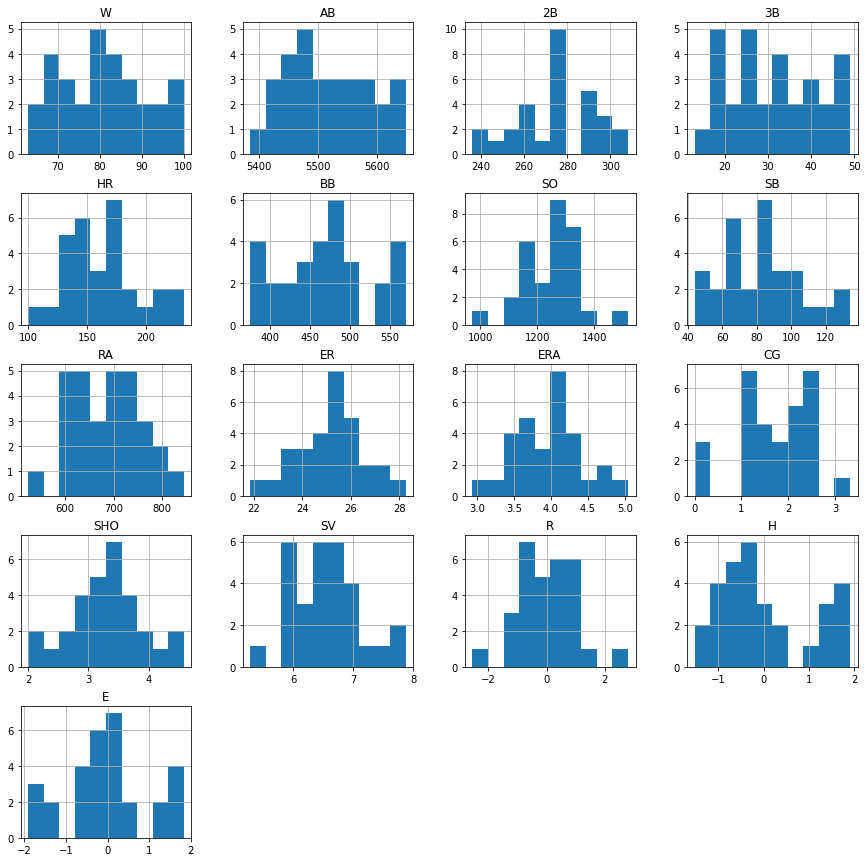

In [21]:
baseball_ds.hist(figsize=(15,15));

In [22]:
#Bivariate analysis

Text(0.5, 1.0, 'CG wise wins')

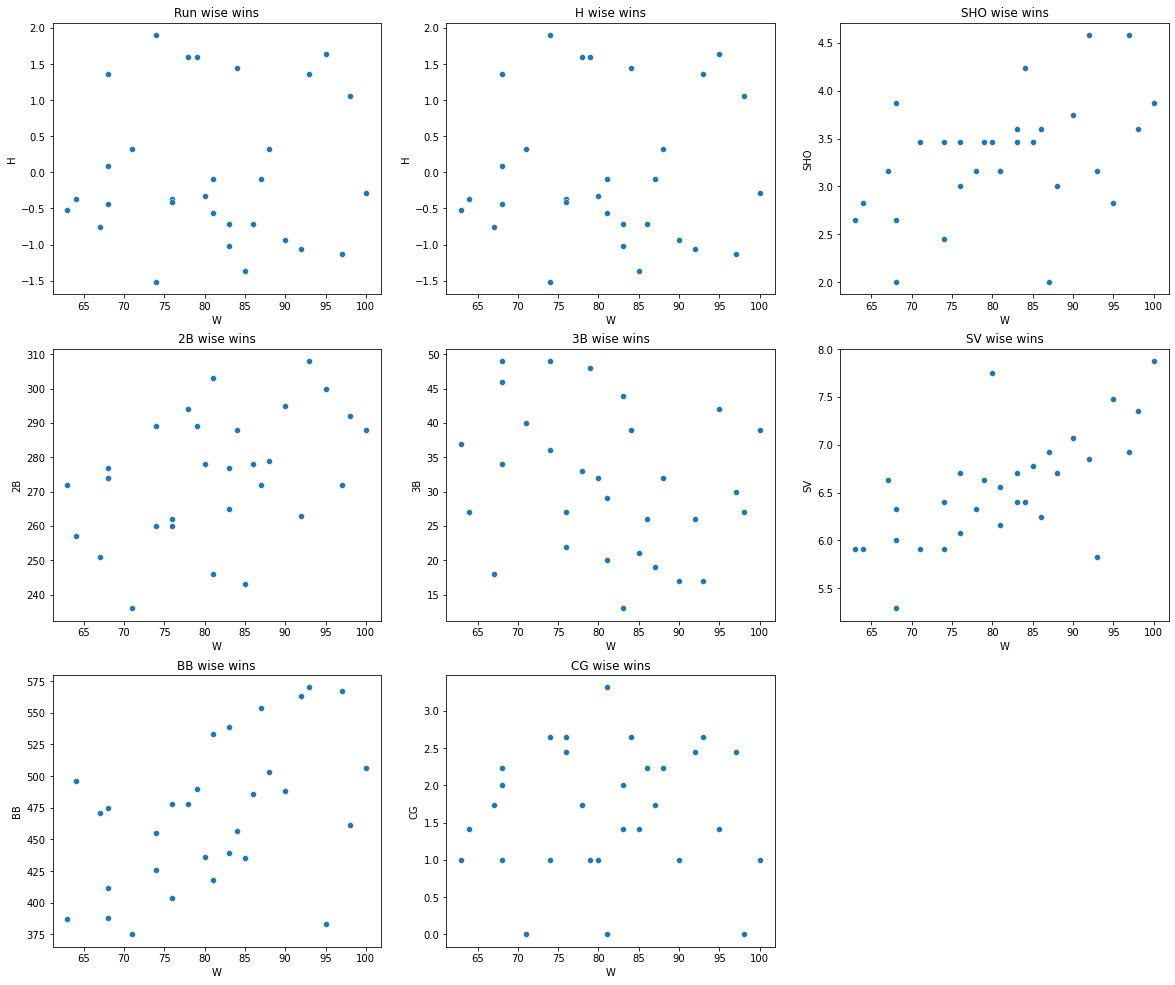

In [24]:
# checking some random features' relation with Win. 
plt.figure(figsize=(20,17))
plt.subplot(331)
sns.scatterplot(x = "W", y = "H", data = baseball_ds)
plt.title("Run wise wins")

plt.subplot(332)
sns.scatterplot(x = "W", y = "H", data = baseball_ds)
plt.title("H wise wins")

plt.subplot(333)
sns.scatterplot(x = "W", y = "SHO", data = baseball_ds)
plt.title("SHO wise wins")

plt.subplot(334)
sns.scatterplot(x = "W", y = "2B", data = baseball_ds)
plt.title("2B wise wins")

plt.subplot(335)
sns.scatterplot(x = "W", y = "3B", data = baseball_ds)
plt.title("3B wise wins")

plt.subplot(336)
sns.scatterplot(x = "W", y = "SV", data = baseball_ds)
plt.title("SV wise wins")

plt.subplot(337)
sns.scatterplot(x = "W", y = "BB", data = baseball_ds)
plt.title("BB wise wins")

plt.subplot(338)
sns.scatterplot(x = "W", y = "CG", data = baseball_ds)
plt.title("CG wise wins")

<AxesSubplot:>

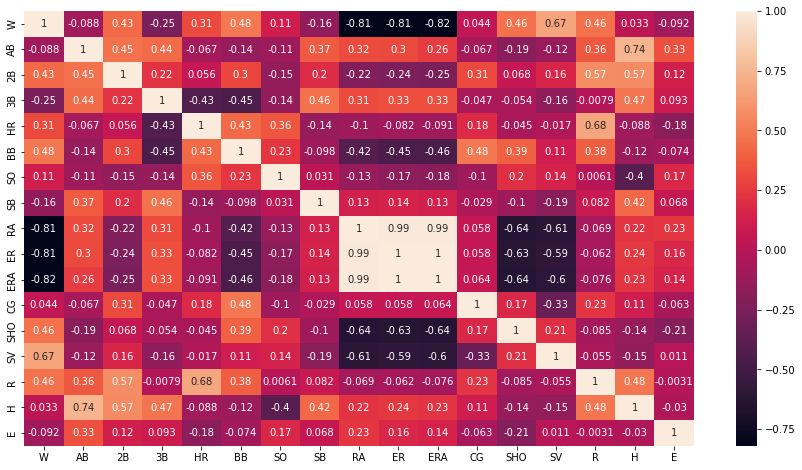

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(baseball_ds.corr(),annot=True)

In [26]:

# Dropping the most correlated columns 
baseball_ds = baseball_ds.drop(columns=["RA","ER","AB","HR"]) 

In [27]:
X = baseball_ds.drop("W",axis = 1)
y = baseball_ds["W"]

# assiging some important value to a value for Adjusted R2 score
Num_predictor = X.columns
n_size  = len(X)

# appying Standard scaler on the data to bring all feature at same scale
Sc = StandardScaler()
X = Sc.fit_transform(X)

models = [LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

In [28]:
LR = LinearRegression()
for i in range(50,200,40):
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = i)
  LR.fit(X_train,y_train)
  print("training_score :",LR.score(X_train,y_train),"Random_state", i )
  pred = LR.predict(X_test)
  print("Test_score : ",LR.score(X_test,y_test))
  print("Root_Mean_squared_Error",mean_squared_error(y_test,pred,squared=False))
  print("Mean_squared_Error",mean_squared_error(y_test,pred))
  print("R2_score",r2_score(y_test,pred),"\n")

training_score : 0.9575970929647264 Random_state 50
Test_score :  0.7578493195008751
Root_Mean_squared_Error 5.42379240718714
Mean_squared_Error 29.41752407626087
R2_score 0.7578493195008751 

training_score : 0.9383095930725811 Random_state 90
Test_score :  0.7438348656386357
Root_Mean_squared_Error 5.1053699592947055
Mean_squared_Error 26.064802421268823
R2_score 0.7438348656386357 

training_score : 0.9374124455488735 Random_state 130
Test_score :  0.0412862655235976
Root_Mean_squared_Error 6.475240997927522
Mean_squared_Error 41.92874598124141
R2_score 0.0412862655235976 

training_score : 0.9340738400011833 Random_state 170
Test_score :  0.707529621344622
Root_Mean_squared_Error 4.9928478777852305
Mean_squared_Error 24.928529930704478
R2_score 0.707529621344622 



In [29]:
from sklearn.linear_model import Lasso, Ridge
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.25, random_state = 90)

In [30]:
Las = Lasso(alpha= 1)
Las.fit(X_train1,y_train1)
print("training_score :",Las.score(X_train1,y_train1))
pred = Las.predict(X_test1)
print("Test_score : ",Las.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.8732248162306531
Test_score :  0.8963565193749586
Root_Mean_squared_Error 3.24741807496324
Mean_squared_Error 10.545724153597956
R2_score 0.8963565193749586


In [31]:
rig = Ridge(alpha= 1)
rig.fit(X_train1,y_train1)
print("training_score :" , rig.score(X_train1,y_train1))
pred = rig.predict(X_test1)
print("Test_score : ",rig.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
r2 = r2_score(y_test1,pred)
print("R2_score",r2_score(y_test1,pred))

training_score : 0.9321877338737808
Test_score :  0.8035924402551555
Root_Mean_squared_Error 4.470399221997733
Mean_squared_Error 19.984469204037932
R2_score 0.8035924402551555


In [32]:
RR = RandomForestRegressor(n_estimators=300,max_depth=3,max_features= "sqrt")
RR.fit(X_train1,y_train1)
print("training_score :" , RR.score(X_train1,y_train1))
pred = RR.predict(X_test1)
print("Test_score : ",RR.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.8760099926660744
Test_score :  0.6127000263803692
Root_Mean_squared_Error 6.277561016493382
Mean_squared_Error 39.40777231579742
R2_score 0.6127000263803692


In [33]:
KNR = KNeighborsRegressor()
KNR.fit(X_train1,y_train1)
print("training_score :" , KNR.score(X_train1,y_train1))
pred = KNR.predict(X_test1)
print("Test_score : ",KNR.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.6045443841803547
Test_score :  0.43449631449631454
Root_Mean_squared_Error 7.585512507405152
Mean_squared_Error 57.54
R2_score 0.43449631449631454


In [34]:

Adabost = AdaBoostRegressor(n_estimators=200)
Adabost.fit(X_train1,y_train1)
print("training_score :" , Adabost.score(X_train1,y_train1))
pred = Adabost.predict(X_test1)
print("Test_score : ",Adabost.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.9952571625264593
Test_score :  0.41093741468741474
Root_Mean_squared_Error 7.74190661630296
Mean_squared_Error 59.93711805555555
R2_score 0.41093741468741474


In [35]:
GradiantBoost = GradientBoostingRegressor(n_estimators=200)
GradiantBoost.fit(X_train1,y_train1)
print("training_score :" , GradiantBoost.score(X_train1,y_train1))
pred = GradiantBoost.predict(X_test1)
print("Test_score : ",GradiantBoost.score(X_test1,y_test1))
print("Root_Mean_squared_Error",mean_squared_error(y_test1,pred,squared=False))
print("Mean_squared_Error",mean_squared_error(y_test1,pred))
print("R2_score",r2_score(y_test1,pred))

training_score : 0.9999999999964567
Test_score :  0.0443799414083389
Root_Mean_squared_Error 9.860747484937514
Mean_squared_Error 97.23434096170152
R2_score 0.0443799414083389


In [36]:
# Observation:

In [37]:
# taking ridge as the final model
parameter = {"alpha" : [0.3,0.4,0.5,0.7,1]}
grid_lasso = Lasso()

grid_search = GridSearchCV(grid_lasso,parameter,scoring = "neg_mean_squared_error",cv = 10, n_jobs =-1, verbose = 2) 

grid_search.fit(X_train1,y_train1)
print(grid_search.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'alpha': 1}


In [38]:
best_Las = Lasso(alpha= 1)
for i in range(2,10):
  cross_score = cross_val_score(best_Las,X,y,cv = i)
  print(i,"Mean ",cross_score.mean(),"STD",cross_score.std())

2 Mean  0.5432689867137896 STD 0.08427196960847078
3 Mean  0.7038658394883736 STD 0.199687333910691
4 Mean  0.8076569512631671 STD 0.08431845814153169
5 Mean  0.5639142733434708 STD 0.3952212746174916
6 Mean  0.6200711496959976 STD 0.38993971206997
7 Mean  0.5511878929824001 STD 0.37563939508054806
8 Mean  0.6301081800023589 STD 0.450506890623658
9 Mean  -3.4371542813759426 STD 11.35693236185559


In [39]:
cross_score = cross_val_score(best_Las,X,y,cv = 4)
print("Mean ",cross_score.mean(),"STD",cross_score.std())

Mean  0.8076569512631671 STD 0.08431845814153169
